In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv',encoding='latin')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## Process
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## 1. Data Cleaning


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicates
df.duplicated().sum()

403

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
# check for duplicates
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [23]:
import matplotlib.pyplot as plt

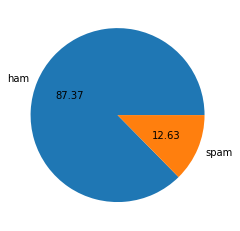

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
#imbalanced data

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/raj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

/tmp/ipykernel_7200/253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [29]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [30]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

/tmp/ipykernel_7200/2523084615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

/tmp/ipykernel_7200/3435151431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
# ham sms
df[df.target == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# spam sms
df[df.target == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

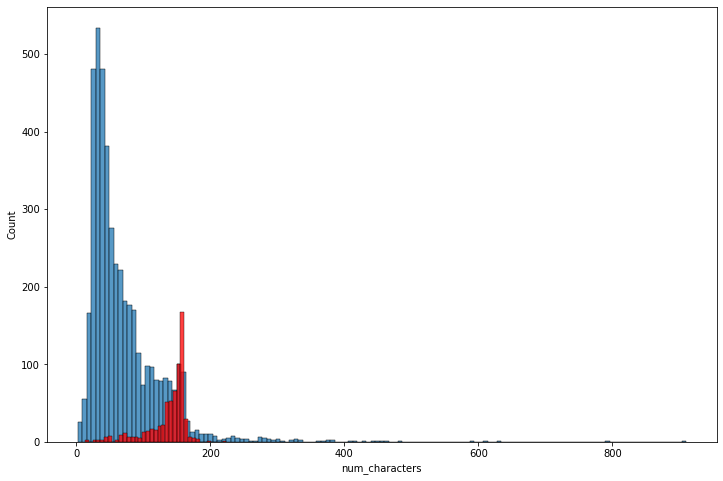

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

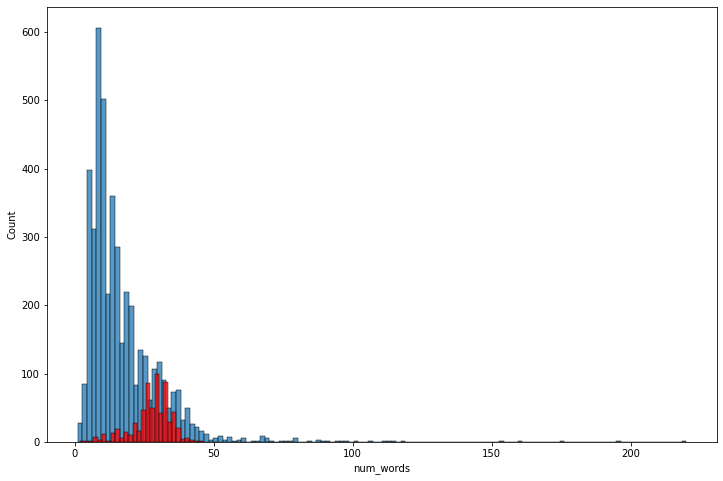

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

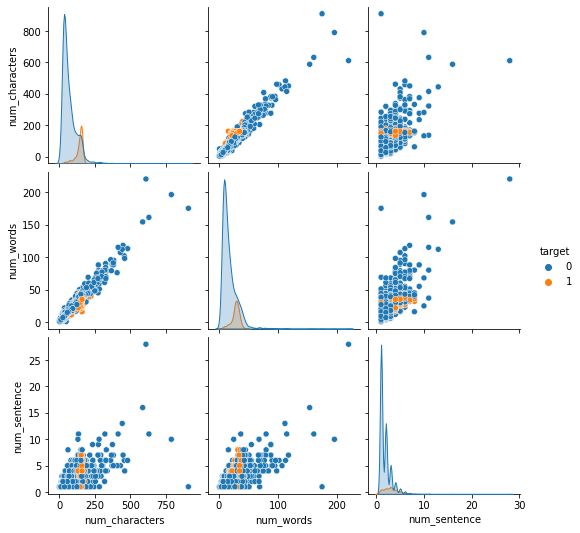

In [39]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

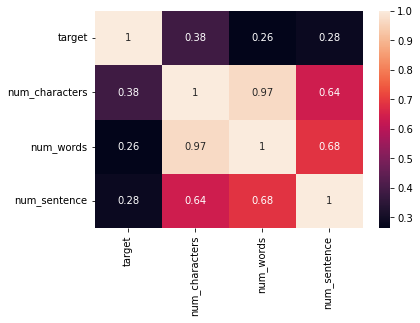

In [40]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
   * Lower Case
   * Tokenization
   * Removing special Character
   * Removing stop words and punctuation
   * Stemming

In [50]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [51]:
def transform_text(text):
    text = text.lower() #convert to lower case
    text = nltk.word_tokenize(text) #seprate words from sentence
    y = []
    for i in text:
        if i.isalnum(): #checking if word is only alphabet numeric
            y.append(i) 
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [52]:
df['transform_text'] = df['text'].apply(transform_text)

/tmp/ipykernel_7200/360176214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['text'].apply(transform_text)


In [53]:
df

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [54]:
from wordcloud import WordCloud

In [55]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_cloud = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

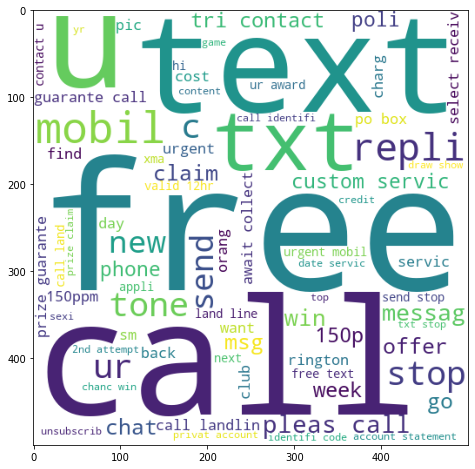

In [57]:
plt.figure(figsize=(15,8))
plt.imshow(spam_cloud)

In [58]:
ham_cloud = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

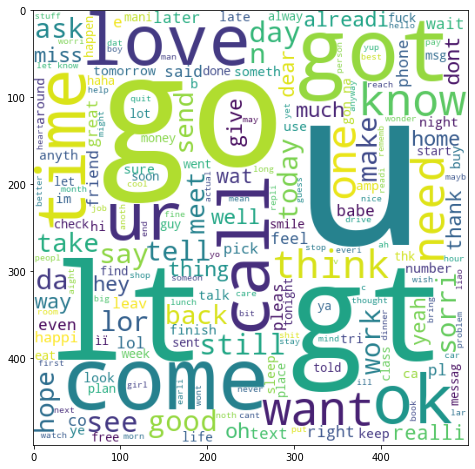

In [59]:
plt.figure(figsize=(15,8))
plt.imshow(ham_cloud)

In [60]:
#find out 30 most occuring word

In [61]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [63]:
from collections import Counter
msg_cout = Counter(spam_corpus).most_common(30)

In [64]:
msg_cout = pd.DataFrame(msg_cout)

/home/raj/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


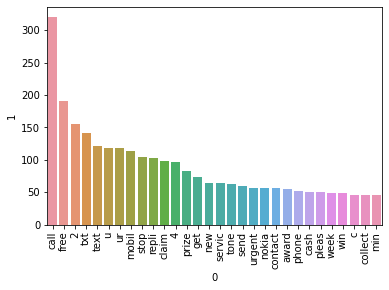

In [65]:

sns.barplot(msg_cout[0],msg_cout[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

    counterVectorizer --> Bag of words technique
    TfidfVectorizer --> Tf-Idf technique (Term frquency * Inverse document Term)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer()

In [98]:
x = cv.fit_transform(df['transform_text']).toarray()

In [99]:
x2 = tfidf.fit_transform(df['transform_text']).toarray()

In [100]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
x.shape

(5169, 6708)

In [104]:
x2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
x2.shape

(5169, 6708)

In [74]:
y = df.target.values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
## Train Test split

In [77]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [112]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [113]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [114]:
# we get the best precision score with TF-IDF and Multinomial NB

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier(n_jobs=-1)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2,n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2,n_jobs=-1)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2,n_jobs=-1)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2,n_jobs=-1)

In [122]:
classifiers = {
    'SVC'  :  svc,
    'KN' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb': xgb
}

In [123]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [124]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [127]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    cur_accu , curr_pres = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("for:",name)
    print("accuracy:",cur_accu)
    print("precision:",curr_pres)
    
    accuracy_scores.append(cur_accu)
    precision_scores.append(curr_pres)

for: SVC
accuracy: 0.9729206963249516
precision: 0.9741379310344828
for: KN
accuracy: 0.9003868471953579
precision: 1.0
for: MNB
accuracy: 0.9593810444874274
precision: 1.0
for: DT
accuracy: 0.9361702127659575
precision: 0.8461538461538461
for: LR
accuracy: 0.9516441005802708
precision: 0.94
for: RF
accuracy: 0.9738878143133463
precision: 1.0
for: AdaBoost
accuracy: 0.9613152804642167
precision: 0.9454545454545454
for: Bgc
accuracy: 0.9584139264990329
precision: 0.8625954198473282
for: ETC
accuracy: 0.9758220502901354
precision: 0.9829059829059829
for: GBDT
accuracy: 0.9526112185686654
precision: 0.9238095238095239
for: xgb
accuracy: 0.9690522243713733
precision: 0.9344262295081968


In [173]:
performance_df = pd.DataFrame({'algo':classifiers.keys(),'accuracy':accuracy_scores,'precision':precision_scores
}).sort_values(by='precision',ascending=False)

In [174]:
performance_df

,algo,accuracy,precision
1,KN,0.900387,1.000000
2,MNB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595


In [176]:
# we will use Random Forest

In [177]:
import pickle

In [179]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))